# Reinforcement Learning Basics

**Reinforcement learning** (RL) is a category of machine learning and it is best understood as If we have an **agent** that interacts with an **environment** such that it can observe the environment **state** and perform **actions**. Upon doing actions, the environment state changes into a new state and the agent recieves a **reward** (or penalty). Reinforcement learning aims at making this agent learn from his experience of interactions with environment so that it chooses the best actions that maximizes the sum of rewards it receives from the environment. 
<img src="images/rl_diagram.png">

Mathematically, RL is described using a framework called **Markov Decision Process** (MDP). Formally, MDP is defined by a tuple of five items $<S, A, P, R, $$\gamma$$>$, which are:
- $S$:  Set of observations. The agent observes the environment state as one item of this set.
- $A$: Set of actions. The set of actions the agent can choose one from to interact with the environment.
- $P$: $P(s'| s, a)$ transition probability matrix. This models what next state $s'$ will be after the agent makes action a while being in the current state $s$.
- $R$: $P(r | s, a)$ reward model that models what reward the agent will recieve when it performs action $a$ when it is in state $s$.
- $\gamma$: discount factor. This factor is a numerical value between 0 and 1 that represents the relative importance between immediate and future rewards. 

The goal of the RL, is to solve the MDP by finding *optimal policy* which means finding the sequence of action it can make to maximize the total recieved reward. The two fundamental method for solving MDP's are **value iteration** and **policy iteration** algorithms. Both value-iteration and policy-iteration assume that the agent knows the MDP model of the world (i.e. the agent knows the state-transition and reward probability functions). Therefore, they can be used by the agent to (offline) plan its actions given knowledge about the environment before interacting with it. We will discuss these two approaches in this notebook. 

### MDP

We saw that MDP consists of a tuple of 5 elements, $<S, A, P, R, $$\gamma$$>$.  The way by which the agent choses which action to perform is named the agent **policy** which is a function that takes the current environment state to return an action. The policy is often denoted by the symbol $\pi$.
$$\pi(s) : \mathbb{S} \rightarrow \mathbb{A}$$

Let’s now differentiate between two types environments.

 - **Deterministic environment**: deterministic environment means that both state transition model and reward model are detereminstic functions. If the agent while in a given state repeats a given action, it will always go the same next state and recieve the same reward value.
 
- **Stochastic environment**: In a stochastic environment there is uncertainity about the actions effect. When the agent repeats doing the same action in a given state, the new state and received reward may not be the same each time. For example, a robot which tries to move forward but because of the imperfection in the robot operation or other factors in the environment (e.g. slippery floor), sometimes the action forward will make it move forward but in sometimes, it will move to left or right.

Deterministic environments are easier to solve, because the agent knows how to plan its actions with no-uncertaintiy given the environment MDP. Possibly, the environment can be modeled in as a graph where each state is a node and edeges represent transition actions frome one state to another and edge weights are recieved rewards. Then, the agent can use a graph search algorithm such as A* to _find the path with maximum total reward form the initial state_.

The goal of the agent is to pick the best policy that will maximize the total rewards recieved from the environment. 

Assume that environment is intially at state $s_0$. At time 0 : Agent observes the environment state $s_0$ and picks an action $a_0$, then upon performing its action, environment state becomes $s_1$ and the agent recieves a reward $r_1$. At time 1: Agent observes current state $s_1$ and picks an action $a_1$ , then upon acting its action, environment state becomes $s_2$ and it recieves a reward $r_2$. So the **total reward** recieved by the agent in response to the actions selected by its policy is going to be: 
$$\text{total_reward} = r_1 + r_2 + \dots$$.

However, it is common to use a discount factor to give higher weight to near rewards recieved near than rewards recieved further in the future.
$$\text{total_discounted_reward} = r_1 + \gamma\ r_2 + \gamma^{2}\ r_3 + \dots = \sum_{i=1}^{T} \gamma^{i-1}\ r_i$$
where `T` is the horizon (episode length) which can be infinity if there is maximum length for the episode.


The **value function** $V(s)$ represent how good is a state for an agent to be in. It is equal to expected total reward for an agent starting from state $s$. The value function depends on the policy $\pi$ by which the agent picks actions to perform.
$$V^{\pi}(s) = \mathbb{E}[\sum_{i=1}^T \gamma^{i-1} r_i], \forall s \in \mathbb{S}$$

Among all possible value-functions, there exist an optimal value function that has higher value than other functions for all states.
$$V^{*}(s) = \max_{\pi} V^{\pi}(s), \forall s \in \mathbb{S}$$

The optimal policy $\pi^{*}$ is the policy that corresponds to optimal value function.
$$\pi^{*} = \arg\max_{\pi} V^{\pi}(s), \forall s \in \mathbb{S}$$

In addition to the state value-function, for convenience RL algorithms introduce another function which is the state-action pair **Q function**. Q is a function of a state-action pair and returns a real value.
$$\mathbf{Q}:\mathbb{S} \times \mathbb{A} \rightarrow \mathbb{R}$$

The optimal Q-function $Q^{*}(s, a)$ means the expected total reward recieved by an agent starting in sand picks action $a$, then will behave optimally afterwards. There, $Q^{*}(s, a)$ is an indication for how good it is for an agent to pick action a while being in state $s$.

Since $V^{*}(s)$ is the maximum expected total reward when starting from state $a$, it will be the maximum of $Q^{*}(s, a)$over all possible actions. Therefore, the relationship between Q*(s, a) and V*(s) is easily obtained as:
$$V^{*}(s) = \max_{a} Q^{*}(s,a), \forall s \in \mathbb{S}$$

and If we know the optimal Q-function Q*(s, a) , the optimal policy can be easily extracted by chosing the action a that gives maximum Q*(s, a) for state s.

Now, given these, we can introduce **Bellman equations**. Bellman equation using dynamic programming paradigm provides a recursive definition for the optimal Q-function. The $Q^{*}(s, a)$ is equal to the summation of immediate reward after performing action $a$ while in state $s$ and the discounted expected future reward after transition to a next state $s'$.
$$Q^{*}(s,a) = R(s,a) + \gamma \mathbb{E}_{s'}[V^{*}(s')]$$
$$Q^{*}(s,a) = R(s,a) + \gamma \sum_{s' \in \mathbb{S}} p(s'|s,a) V^{*}(s')$$

Since $V^{*}(S) = \max_{a} Q^{*}(s, a)$, we have
$$V^{*}(S) = \max_{a} \Big( R(s,a) + \gamma \sum_{s' \in \mathbb{S}} p(s'|s, a)V^{*}(s,a) \Big)$$

Value-iteration and policy iteration rely on these equations to compute the optimal value-function.

First, let us take a look at our environment.

## 0. Introduction to environment - Frozen Lake

For this lab we will solve the [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0) environment from [OpenAI gym](https://gym.openai.com/). 
<img src="images/frozen_lake.png" width=50%>

The FrozenLake environment consists of a 4x4 grid of blocks, each one either being the start block, the goal block, a safe frozen block, or a dangerous hole as shown below:
```
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole. At any given time the agent can choose to move either up, down, left, or right. The catch is that there is a wind which occasionally blows the agent onto a space they didn’t choose. As such, perfect performance every time is impossible, but learning to avoid the holes and reach the goal are certainly still doable. The reward at every step is 0, except for entering the goal, which provides a reward of 1.

#### Working with OpenAI gym
To get you acquanted with OpenAI's gym environment, here are some basic syntax:
1. `env.reset()` - resets the environment
2. `env.step(action)` - applies the given action in the environment which returns four values:<br>
(a) `observation` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game. <br>
(b) `reward` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward. <br>
(c) `done` (boolean): whether it's time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.) <br>
(d) `info` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment's last state change). However, official evaluations of your agent are not allowed to use this for learning.

## 1. Random Search

Now, lets see if how far can a `random search` for a good policy achieve for this problem.
In this problem, we have 16 states and 4 possible moves. As a result, there exist $4^{16}=4294967296$ possible policies. Of course, it is not feasible to evaluate all of them, but we can generate a random set of solutions and select the best among them.

In [1]:
import numpy as np
import time

import gym

def run_episode(env, policy, episode_len=100, render=False):
    total_reward = 0
    obs = env.reset()
    for t in range(episode_len):
        if render:
            env.render()
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, n_episodes=100):
    total_rewards = 0.0
    for _ in range(n_episodes):
        total_rewards += run_episode(env, policy)
    return total_rewards / n_episodes

def gen_random_policy():
    return np.random.choice(4, size=((16)))

if __name__ == '__main__':
    env = gym.make('FrozenLake-v0')
    ## Policy search
    n_policies = 2000
    start = time.time()
    policy_set = [gen_random_policy() for _ in range(n_policies)]
    policy_score = [evaluate_policy(env, p) for p in policy_set]
    end = time.time()

    print("Best score = %0.2f. Time taken = %4.4f seconds" %(np.max(policy_score) , end - start))

[2017-07-14 14:01:01,794] Making new env: FrozenLake-v0


Best score = 0.33. Time taken = 40.4403 seconds


## 2. Q-Learning with Tables

We will now see, how Q-Learning can solve our `frozen lake` problem. In it’s simplest implementation, Q-Learning is a table of values for every state (row) and action (column) possible in the environment, refered to as **Q-Table**. Within each cell of the table, we learn a value for how good it is to take a given action within a given state. In the case of the FrozenLake environment, we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a 16x4 table of Q-values. We start by initializing the table to be uniform (all zeros), and then as we observe the rewards we obtain for various actions, we update the table accordingly.

We make updates to our Q-table using something called the Bellman equation (as discussed above).

In [2]:
# Imports
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the environment
env = gym.make('FrozenLake-v0')

[2017-07-14 14:01:43,809] Making new env: FrozenLake-v0


In [4]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
lr = .8
gamma = .95
num_episodes = 2000

#create lists to contain total rewards and steps per episode
jList = []
rList = []

# Start training
start_time = time.time()
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + gamma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    jList.append(j)
    rList.append(rAll)

# Print log
print ("Score over time: " +  str(sum(rList)/num_episodes))    
print ("Time taken", time.time() - start_time)

Score over time: 0.548
Time taken 3.6498754024505615


In [5]:
print ("Final Q-Table Values")
print (Q)

Final Q-Table Values
[[  1.37718126e-01   6.22212300e-03   7.82346367e-03   1.08634664e-02]
 [  8.22656551e-04   1.96271460e-04   1.83133639e-04   2.92104071e-01]
 [  3.30513279e-04   3.62776897e-03   4.62518972e-03   1.81102335e-01]
 [  3.61107777e-04   2.43793204e-03   9.76952673e-06   8.49415944e-02]
 [  2.19907993e-01   1.69451419e-05   4.88512211e-03   1.27936154e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.77134024e-04   4.90985894e-03   9.30872161e-04   8.28316096e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.22622679e-03   2.39262718e-04   1.19981382e-03   1.87270279e-01]
 [  4.71029589e-05   5.48408446e-01   4.17761020e-05   1.59409287e-03]
 [  5.14609050e-02   0.00000000e+00   2.18161423e-04   2.55231363e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.18655735e-03   3.97922572e-01   0

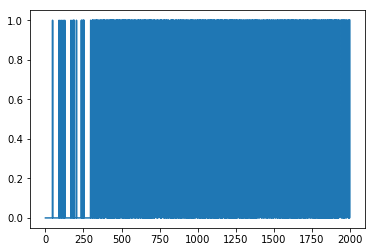

In [6]:
plt.plot(rList)

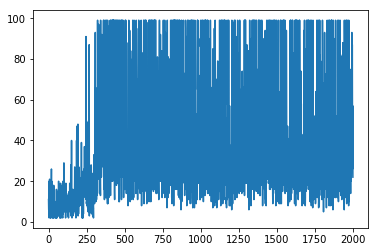

In [7]:
plt.plot(jList)

## 3. Q-Learning with Neural Networks

Tables are great, but they don’t really scale! While it is easy to have a 16x4 table for a simple grid world, the number of possible states in any modern game or real-world environment is nearly infinitely larger. For most interesting problems, tables simply don’t work. We instead need some way to take a description of our state, and produce Q-values for actions without a table: that is where neural networks come in. By acting as a **function approximator**, **Q-Networks** we can take any number of possible states that can be represented as a vector and learn to map them to Q-values. Again the update steps come from Bellman Equations discussed above. 

Here, we are using [epsilon greedy strategy](https://en.wikipedia.org/wiki/Reinforcement_learning#Exploration).

In [8]:
# Imports
import gym
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Create environment
env = gym.make('FrozenLake-v0')

[2017-07-14 14:01:48,450] Making new env: FrozenLake-v0


In [ ]:
# set learning hyper-parameter value
gamma = 0.99
e = 0.1
mu = 0.07
num_episodes = 2000

In [ ]:
# Here we will define a feed forward neural network
class Q_Net(nn.Module):
    def __init__(self):
        super(Q_Net, self).__init__()
        self.fc = nn.Linear(16, 4, bias=False)
    
    def forward(self, x):
        return self.fc(x)
    
# Initialize the net
Q = Q_Net()

# Loss setup
criterion = nn.MSELoss()

# Optimizer setup
optimizer = optim.SGD(Q.parameters(), lr=mu)

In [ ]:
# create list to contain total rewards and steps per episode
jList = []
rList = []

# Training the network
start_time = time.time()
for i in range(num_episodes):
    # reset the environment to get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    # The Q-Network
    while j < 99:
        j += 1
        # choose an action greedily (with e chance of random action) from the Q-Network
        inp = Variable(torch.eye(16), requires_grad=False)
        
        # reset the gradient matrix of the network
        optimizer.zero_grad()
        # forward pass
        current_Q_value = Q(inp[s:s+1])
        # print (allQ)
        # take the arg max of the output
        _, a = torch.max(current_Q_value.data, 1)

        # choose an action greedily (by e chance of random action) from the Q-Network
        if (np.random.rand(1) < e):
            a[0,0] = env.action_space.sample()

        # Get new state and reward from environment
        s1, r, d, _ = env.step(a[0, 0])
        
        # Obtain the Q' values by feeding the new state through our network
        next_Q_value = Q(inp[s1:s1+1]).detach()
        
        # Obtain maxQ' and set our target value for our chosen function
        max_nextQ_value = torch.max(next_Q_value)
        
        targetQ = current_Q_value.data
        targetQ[0, a[0,0]] = r + gamma*max_nextQ_value.data[0]

        # Update the parameters of the network
        targetQ = Variable(targetQ, requires_grad=False)
        
        loss = criterion(current_Q_value, next_Q_value)
        
        loss.backward()
        optimizer.step()
        
        rAll += r
        s = s1
        if (d == True):
            # Reduce the chance of random action as we train the model
            e = 1.0 / ((i/50) + 10)
            break
    jList.append(j)
    rList.append(rAll)

print ("Score over time: " +  str(sum(rList)/num_episodes))
print ("Total time", time.time() - start_time)

In [ ]:
plt.plot(rList)

In [ ]:
plt.plot(jList)

## 4. Excercise

1. Change with the hyper-parameter values, and check the performance of the Q-Network. See the effect of changing learning rate (mu), gamma (gamma) and epsilon (e).
2. Read about other exploration strategies such as (a) greedy (b) random (c) $\epsilon$-greedy (d) Boltzmann Approach from [this blog post](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-7-action-selection-strategies-for-exploration-d3a97b7cceaf).
3. Implement the above exploration strategies, and observe performance of Q-Network.